## Intermediate Data Science

#### University of Redlands - DATA 201
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data201.joannabieri.com](https://joannabieri.com/data201_intermediate.html)

In [2]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

# ML packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Following Along in Lecture

In [4]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [5]:
df=pd.DataFrame(
    data=iris_dataset.data,
    columns=iris_dataset.feature_names)
df["species"] = pd.Categorical.from_codes(iris_dataset.target, iris_dataset.target_names)

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
from sklearn.model_selection import train_test_split

data_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']
target_cols = ['species']

random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(df[data_cols],
                                                    df[target_cols], 
                                                    test_size=0.20, 
                                                    random_state=random_seed)

In [9]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
y_train shape: (120, 1)
X_test shape: (30, 4)
y_test shape: (30, 1)


In [14]:
y_test = y_test.to_numpy().reshape(-1)
y_train = y_train.to_numpy().reshape(-1)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (120,)
y_test shape: (30,)


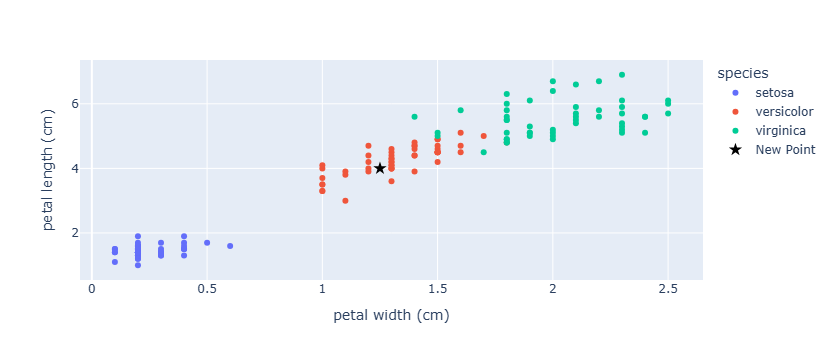

In [16]:
fig = px.scatter(df, x='petal width (cm)',y='petal length (cm)',color=df['species'])
new_data = [1.25,4]

fig.add_scatter(
    x=[new_data[0]],
    y=[new_data[1]],
    mode='markers',
    marker=dict(symbol='star', color='black', size=10),
    name='New Point'
)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
# Create some new data
X_new = pd.DataFrame([[5, 2.9, 1, 0.2]],columns=df.keys()[0:4])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [20]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)

Prediction: ['setosa']


In [21]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']


In [22]:
y_test

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [23]:
# Using numpy
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 1.00


In [24]:
# Using the built in .score() method
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 1.00


---------------
## Introductoin to Machine Learning - Day12 HW

Your job is to play around with K-nearest neighbors!

### Part 1 - build a model

1. Get the Avocado Ripeness data from [https://www.kaggle.com/datasets/amldvvs/avocado-ripeness-classification-dataset](https://www.kaggle.com/datasets/amldvvs/avocado-ripeness-classification-dataset)
2. Discuss the data - who owns it, what is the license, what are the features (variables)?
3. Do some basic analysis: describe for numerical data, value_counts for categorical data and pairplot for a visualization.
    * Write about your observations of the data. Include things like: NaNs, Outliers, Balance in categories.
    * What do you learn from looking at the pairplot colored by (hue='ripeness' vs hue='color_category'). Do some of the features seem like they are good predictors for classifying color or ripeness? Does it seam reasonable that you can classify ripeness or color based on the other variables? Does it seem easier to classify ripeness or color?
4. Do a Train-Test split on the data.
5. Using all of the numerical features as your data columns  and train a KNN model. You choose number of neighbors!
6. Test your model accuracy using the test set. How did you do? For me this resulted in 92% accuracy - if I used 1 neighbor)


### Part 2 - play around with the model - aka tune.

Even though we don't have a validation set, lets use the test set to try to tune the model. This means changing things to see if you can make your model better or worse. Here are some ideas:
* How many neighbors gives you the best results? Does it always help to increase the number of neighbors? Try plotting the number of neighbors vs accuracy for a bunch of tests. I did this in a for loop: training the model and saving the accuracy for 1, 2, 3, ... 20 neighbors.
* Test how many features (variables) you actually need to get a good prediction. Try a few of the ones that seem really good based on the pair plot. What is the minimum number of features you can use to get really good accuracy?

Please write up your conclusions.

Your final notebooks should:

- [ ] Be a completely new notebook with just the Day12 stuff in it NO YOU TRY: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

**Remember to Proof Read and Proof Run your code** Restart the kernel and go through it all once before submitting.